In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
retail_clean = pd.read_csv('retail_clean.csv')
retail_clean.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [3]:
retail_clean = retail_clean.drop(columns = ['Unnamed: 0'])

In [4]:
retail_clean.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [5]:
retail_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      779495 non-null  int64  
 1   StockCode    779495 non-null  object 
 2   Description  779495 non-null  object 
 3   Quantity     779495 non-null  int64  
 4   InvoiceDate  779495 non-null  object 
 5   Price        779495 non-null  float64
 6   Customer ID  779495 non-null  float64
 7   Country      779495 non-null  object 
 8   revenue      779495 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 53.5+ MB


In [6]:
retail_clean['InvoiceDate'] = pd.to_datetime(retail_clean['InvoiceDate'])
retail_clean['date'] = retail_clean['InvoiceDate'].dt.strftime('%Y-%m-%d')
retail_clean['date'] = pd.to_datetime(retail_clean['date'])
retail_clean['month'] = retail_clean.date.dt.month
retail_clean['year'] = retail_clean.date.dt.year
retail_clean['week'] = retail_clean.date.dt.isocalendar().week

In [7]:
retail_clean.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'revenue', 'date', 'month', 'year',
       'week'],
      dtype='object')

In [8]:
time_series = retail_clean.groupby(['week','month','year']).agg(date = ('date','first'),
                                                               total_sales = ('Quantity','sum')).reset_index().sort_values('date')

<Axes: xlabel='date', ylabel='total_sales'>

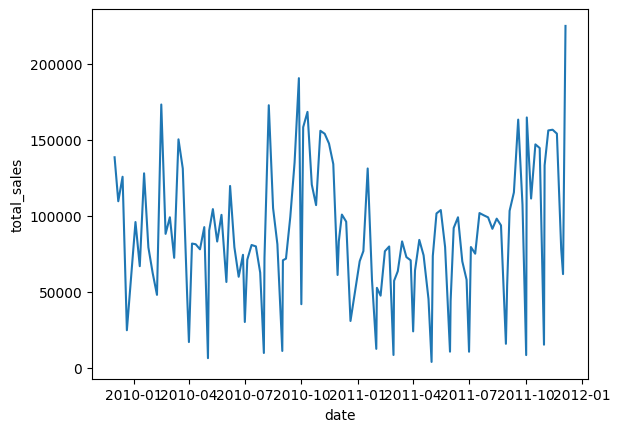

In [9]:
sns.lineplot(x='date',y='total_sales',data=time_series)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
time_series['trends'] = range(time_series.shape[0])
time_series['month'] = time_series['month'].astype('category')

In [12]:
# DROPPING COLUMNS
X= time_series.drop(['week','year','date','total_sales'],axis=1)

In [13]:
names = pd.get_dummies(X).columns
X = pd.get_dummies(X).values
Y = time_series.total_sales.values

In [14]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [15]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [16]:
model.coef_

array([  -113.0786593 ,  -9450.76876892, -18017.41043209,  -3649.89681309,
       -23859.60351657, -18251.54696942, -11580.17759389, -17103.18429737,
        -8681.39674002,  26029.14162532,  23792.13453611,  49253.86754801,
        11518.84142191])

In [17]:
dict1 = list(zip(names,model.coef_))

In [20]:
dict1

[('trends', -113.07865930370264),
 ('month_1', -9450.768768915492),
 ('month_2', -18017.410432087472),
 ('month_3', -3649.8968130932844),
 ('month_4', -23859.603516574753),
 ('month_5', -18251.54696941785),
 ('month_6', -11580.17759388589),
 ('month_7', -17103.184297367385),
 ('month_8', -8681.396740017211),
 ('month_9', 26029.141625321507),
 ('month_10', 23792.13453611478),
 ('month_11', 49253.8675480104),
 ('month_12', 11518.841421912666)]

In [18]:
prediction = model.predict(X)

In [19]:
time_series['prediction'] = prediction

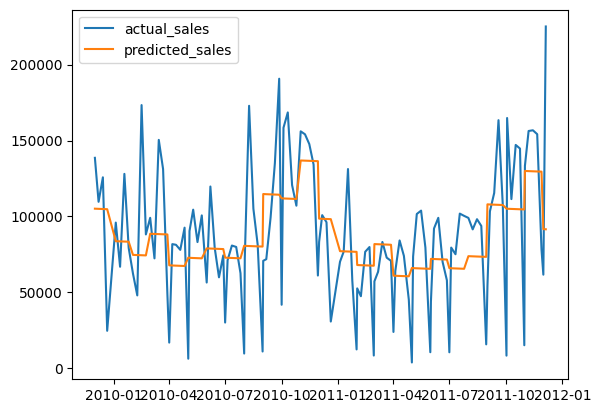

In [22]:
plt.plot(time_series['date'],time_series['total_sales'],label = 'actual_sales')
plt.plot(time_series['date'],time_series['prediction'],label = 'predicted_sales')
plt.legend()
plt.show()

In [23]:
#FORECASTING

In [24]:
max_date = time_series.date.max()

In [25]:
dates = pd.DataFrame({'date':pd.date_range('2011-12-12','2012-08-05',freq='W')})

In [26]:
time_series = pd.concat([time_series,dates],axis=0)

In [27]:
time_series.columns

Index(['week', 'month', 'year', 'date', 'total_sales', 'trends', 'prediction'], dtype='object')

In [28]:
time_series['trends'] = range(time_series.shape[0])
time_series['month'] = time_series['date'].dt.month
time_series['month'] = time_series['month'].astype('category')

In [29]:
# DROPPING COLUMNS

In [30]:
X = time_series.drop(['week','year','date','total_sales'],axis=1)

In [31]:
names = pd.get_dummies(X).columns
X = pd.get_dummies(X).values
Y = time_series.total_sales.values

In [32]:
prediction = model.predict(X)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [33]:
time_series['prediction'] = prediction

ValueError: Length of values (121) does not match length of index (155)

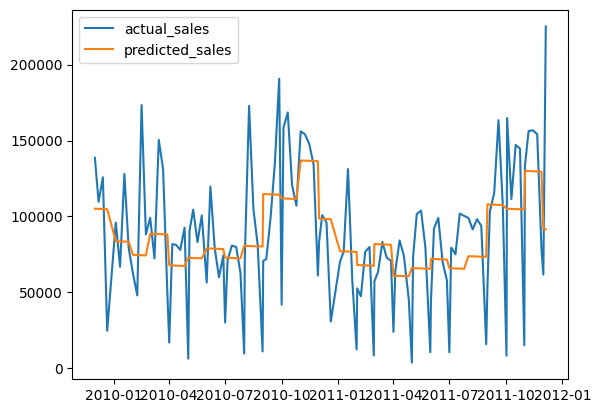

In [34]:
plt.plot(time_series['date'],time_series['total_sales'],label = 'actual_sales')
plt.plot(time_series['date'],time_series['prediction'],label = 'predicted_sales')
plt.legend()
plt.show()